In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Se importan las librerías de base
%matplotlib inline
from pylab import rcParams

# Instala chart_studio

from chart_studio import plotly
from chart_studio import grid_objs
import chart_studio.plotly as property
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# from plotly import tools
import chart_studio.plotly as property
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import math
from sklearn.metrics import mean_squared_error

In [18]:
# Se analizaran las series de tiempo de Amazon e IBM
df_amazon = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
df_ibm = pd.read_csv('IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])

## Exploratory Data Analysis

In [5]:
# Validamos la fecha inicio de los datos
df_amazon.head(5)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


In [6]:
# Validamos la fecha fin de los datos
df_amazon.tail(5)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-12-22,1172.08,1174.62,1167.83,1168.36,1585054,AMZN
2017-12-26,1168.36,1178.32,1160.55,1176.76,2005187,AMZN
2017-12-27,1179.91,1187.29,1175.61,1182.26,1867208,AMZN
2017-12-28,1189.00,1190.10,1184.38,1186.10,1841676,AMZN
2017-12-29,1182.35,1184.00,1167.50,1169.47,2688391,AMZN


In [19]:
# Validamos la fecha inicio de los datos
df_ibm.head(5)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [20]:
# Validamos la fecha fin de los datos
df_ibm.tail(5)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-12-22,151.82,153.00,151.50,152.50,2990583,IBM
2017-12-26,152.51,153.86,152.50,152.83,2479017,IBM
2017-12-27,152.95,153.18,152.61,153.13,2149257,IBM
2017-12-28,153.20,154.12,153.20,154.04,2687624,IBM
2017-12-29,154.17,154.72,153.42,153.42,3327087,IBM


## Análisis Univariado

In [8]:
# Información de columnas de Amazon
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [21]:
# Información de columnas de IBM
df_ibm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3020 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3020 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3020 non-null   float64
 4   Volume  3020 non-null   int64  
 5   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.2+ KB


In [11]:
# Cambia el formato de pandas para visualizar los datos de una forma más amigable
pd.set_option('display.float_format', lambda x:'%.2f' % x)

In [12]:
# Estadisticas Amazon
df_amazon.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3019.00,299.34,280.12,26.09,81.17,205.33,375.57,1204.88
High,3019.00,302.37,281.83,26.30,82.58,208.00,379.15,1213.41
Low,3019.00,296.04,277.93,25.76,79.72,202.10,373.00,1191.15
Close,3019.00,299.38,279.98,26.07,81.09,205.44,375.14,1195.83
Volume,3019.00,5931712.40,5122033.84,986435.00,3137037.00,4724100.00,7135245.50,104404589.00


In [22]:
# Estadisticas IBM
df_ibm.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3019.00,145.52,37.55,72.74,116.41,149.61,178.44,215.38
High,3020.00,146.68,37.61,73.94,117.77,150.33,179.76,215.90
Low,3019.00,144.47,37.48,69.50,115.49,148.47,177.33,214.30
Close,3020.00,145.62,37.53,71.74,116.53,149.31,178.69,215.80
Volume,3020.00,5773300.62,3192830.54,254256.00,3622681.25,4928851.50,6965014.00,30774276.00


In [13]:
# Cuenta el número de ceros por cada columna
df_amazon[df_amazon==0].count() / df_amazon.count()

Open     0.00
High     0.00
Low      0.00
Close    0.00
Volume   0.00
Name     0.00
dtype: float64

In [23]:
# Cuenta el número de ceros por cada columna
df_ibm[df_ibm==0].count() / df_ibm.count()

Open     0.00
High     0.00
Low      0.00
Close    0.00
Volume   0.00
Name     0.00
dtype: float64

In [15]:
# Estadisticas generales
df_amazon.shape

(3019, 6)

In [24]:
# Estadisticas generales
df_ibm.shape

(3020, 6)

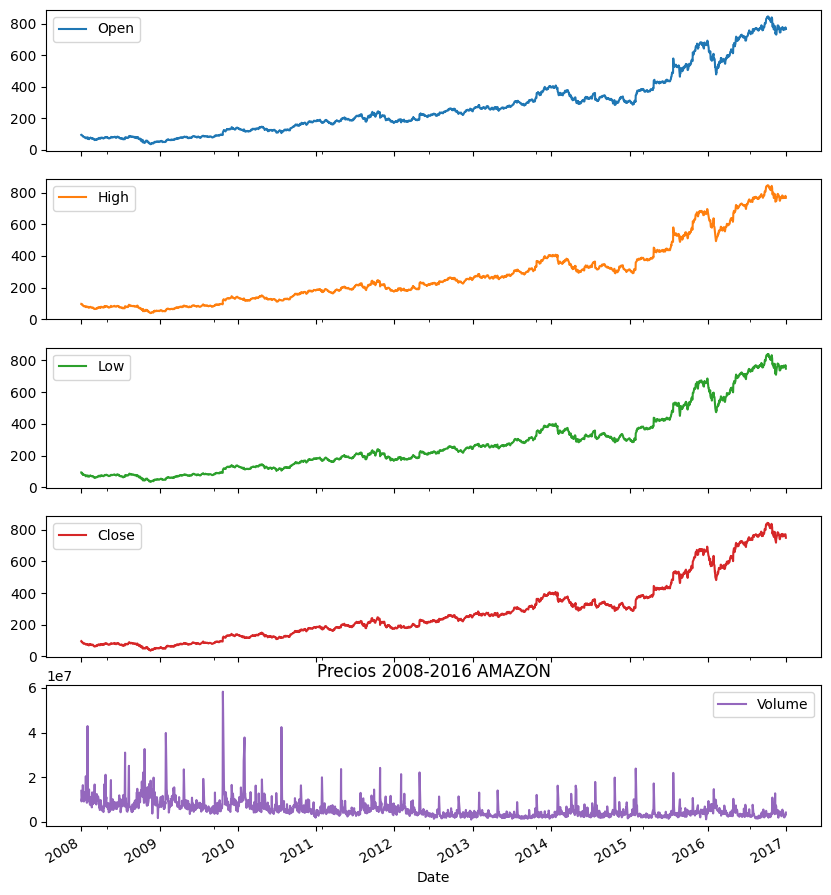

In [17]:
# Visualización de las Series de Tiempo a través de rangos (AMAZON)
df_amazon['2008':'2016'].plot(subplots=True, figsize=(10,12))
plt.title('Precios 2008-2016 AMAZON')
plt.show()

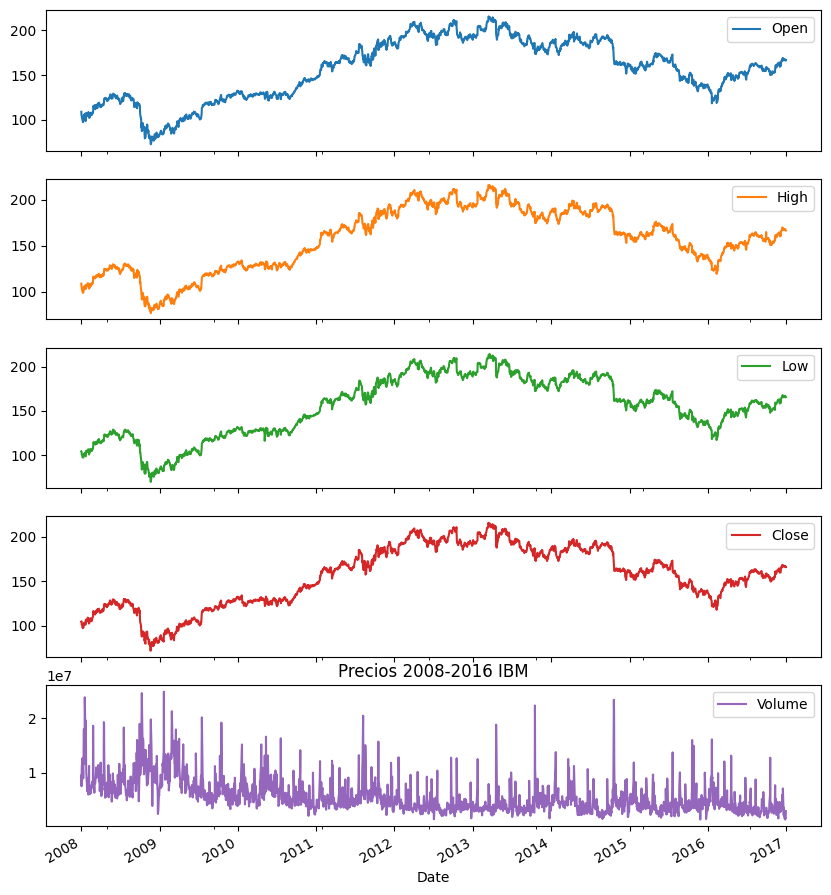

In [26]:
# Visualización de las Series de Tiempo a través de rangos (IBM)
df_ibm['2008':'2016'].plot(subplots=True, figsize=(10,12))
plt.title('Precios 2008-2016 IBM')
plt.show()

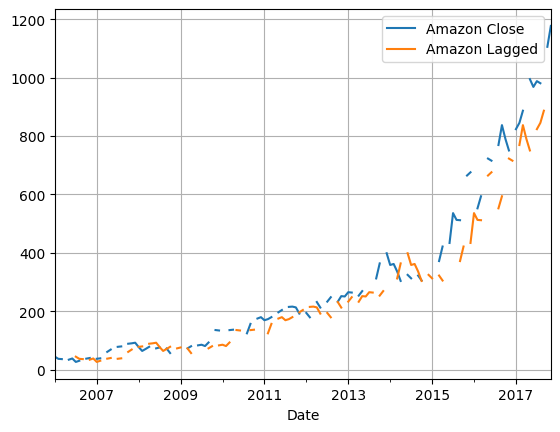

In [29]:
# Visualizamos lags de Amazon
df_amazon['Close'].asfreq('M').plot(legend=True)
lag = 6
shifted = df_amazon['Close'].asfreq('M').shift(lag).plot(legend=True)
shifted.legend(['Amazon Close', 'Amazon Lagged'])
plt.grid()
plt.show()

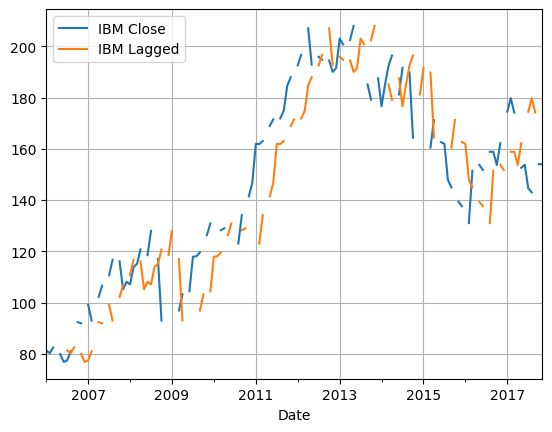

In [30]:
# Visualizamos lags de IBM
df_ibm['Close'].asfreq('M').plot(legend=True)
lag = 6
shifted = df_ibm['Close'].asfreq('M').shift(lag).plot(legend=True)
shifted.legend(['IBM Close', 'IBM Lagged'])
plt.grid()
plt.show()

In [31]:
# Gráfico de cambio porcentual basado en el Close
df_amazon['Change'] = df_amazon.Close.div(df_amazon.Close.shift())

df_ibm['Change'] = df_ibm.Close.div(df_ibm.Close.shift())

In [32]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

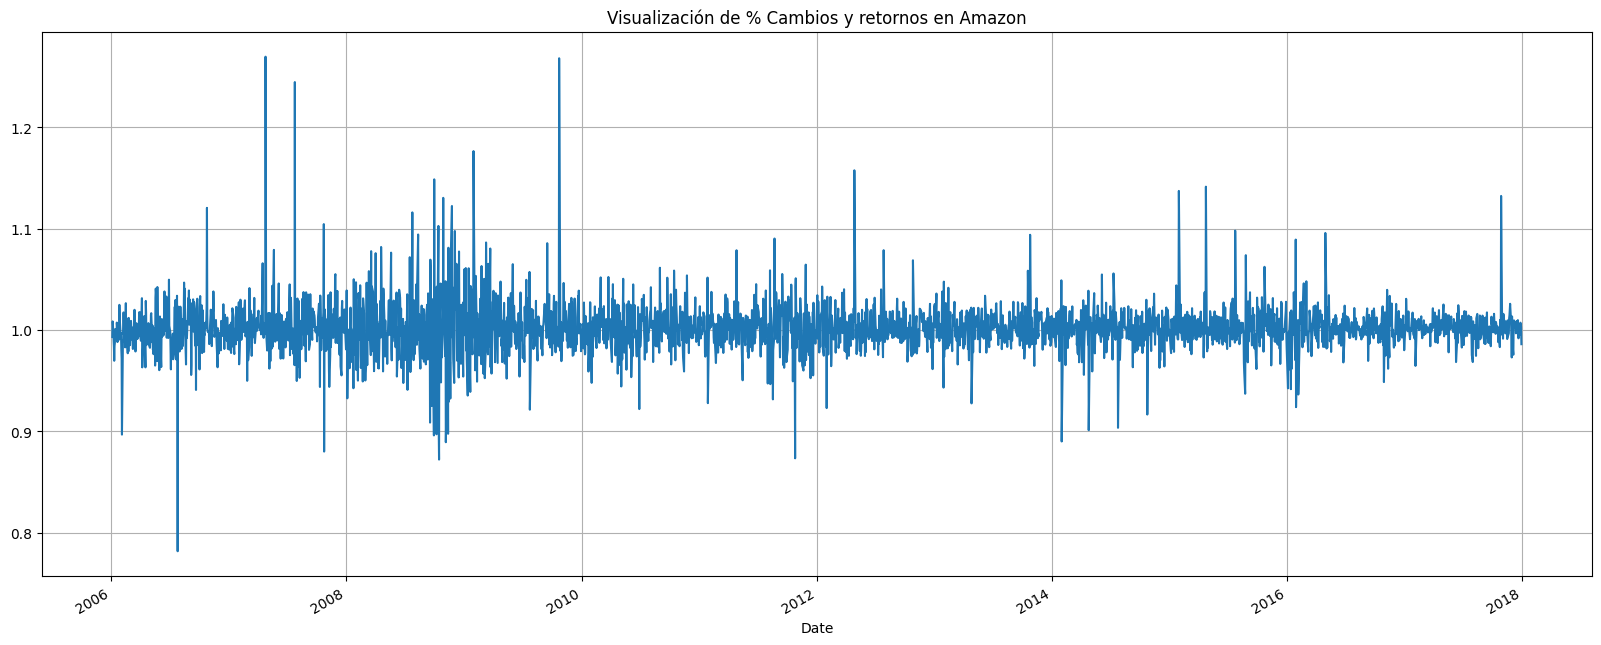

In [58]:
df_amazon['Change'].plot(figsize=(20,8))
plt.title('Visualización de % Cambios y retornos en Amazon')
plt.grid()
plt.show()

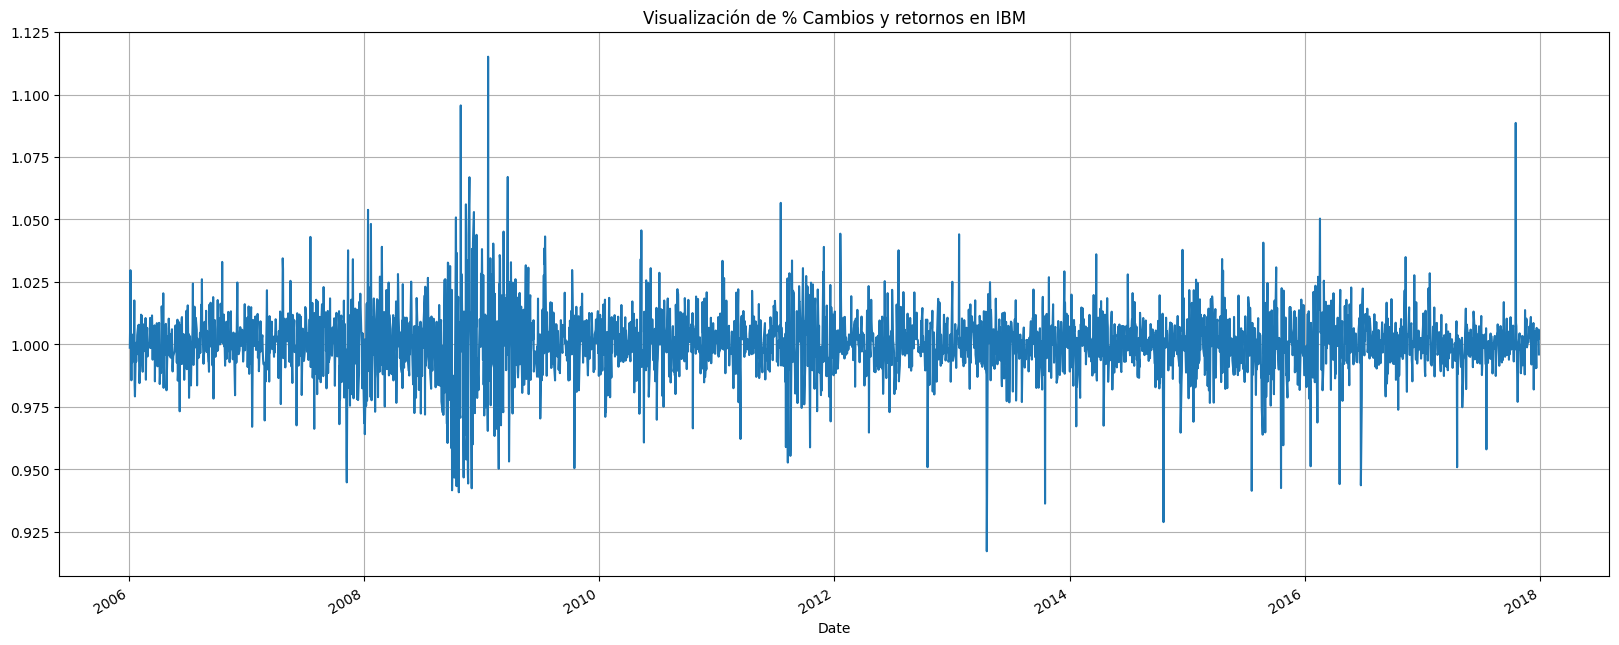

In [59]:
df_ibm['Change'].plot(figsize=(20,8))
plt.title('Visualización de % Cambios y retornos en IBM')
plt.grid()
plt.show()

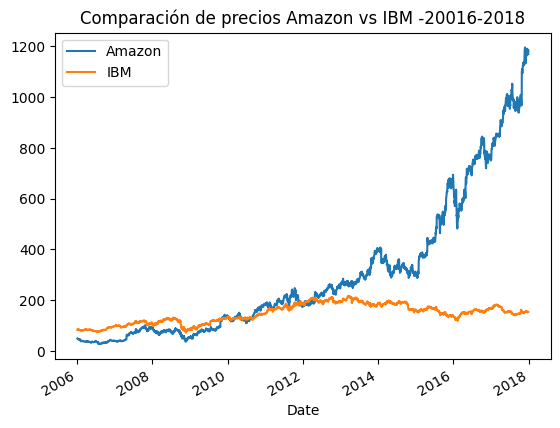

In [40]:
# Comparar las dos series (Amazon e IBM)
df_amazon.Close.plot()
df_ibm.Close.plot()
plt.legend(['Amazon', 'IBM'])
plt.title('Comparación de precios Amazon vs IBM -20016-2018')
plt.show()

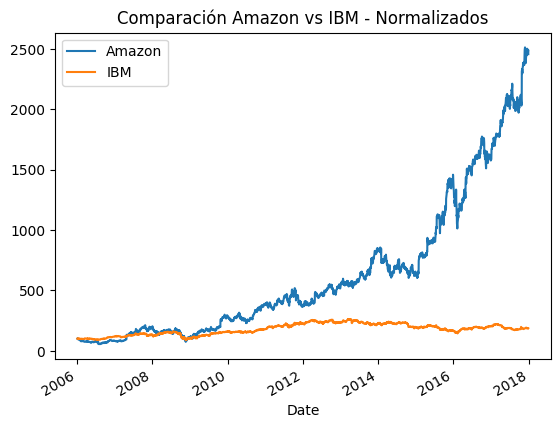

In [41]:
# Se normalizan las vistas con base 100 para tener una base de comparación similar
normal_amazon = df_amazon.Close.div(df_amazon.Close.iloc[0]).mul(100)
normal_ibm = df_ibm.Close.div(df_ibm.Close.iloc[0]).mul(100)
normal_amazon.plot()
normal_ibm.plot()
plt.legend(['Amazon', 'IBM'])
plt.title('Comparación Amazon vs IBM - Normalizados')
plt.show()

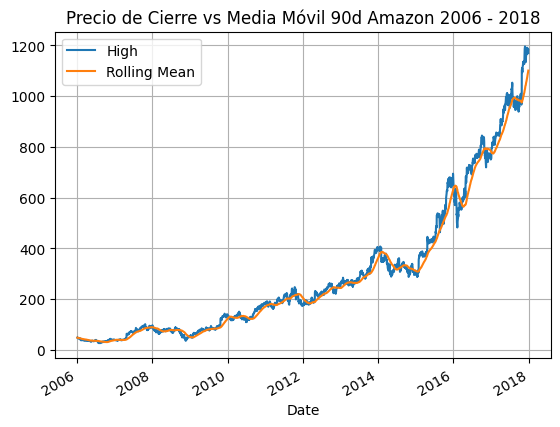

In [44]:
# Ventana Media Móvil en Amazon 90 días
rolling_amazon = df_amazon.Close.rolling('90D').mean()
df_amazon.Close.plot()
rolling_amazon.plot()
plt.title('Precio de Cierre vs Media Móvil 90d Amazon 2006 - 2018')
plt.legend(['High', 'Rolling Mean'])
plt.grid()
plt.show()

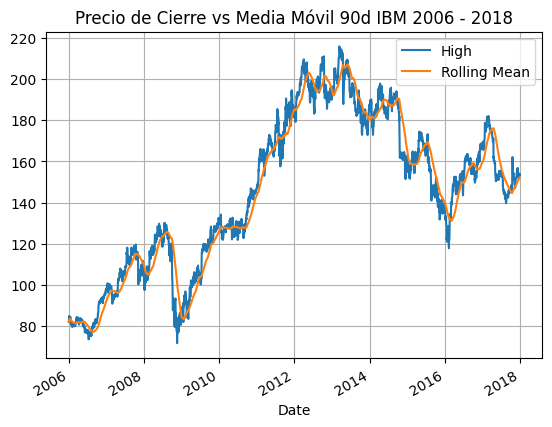

In [45]:
# Ventana Media Móvil en IBM 90 días
rolling_ibm = df_ibm.Close.rolling('90D').mean()
df_ibm.Close.plot()
rolling_ibm.plot()
plt.title('Precio de Cierre vs Media Móvil 90d IBM 2006 - 2018')
plt.legend(['High', 'Rolling Mean'])
plt.grid()
plt.show()

In [49]:
# Gráfico OHLC Amazon (En un mes)
rango_ohlc = go.Ohlc(x=df_amazon.loc['2015-07'].index,
                     open=df_amazon.loc['2015-07'].Open,
                     high=df_amazon.loc['2015-07'].High,
                     low=df_amazon.loc['2015-07'].Low,
                     close=df_amazon.loc['2015-07'].Close)
data = [rango_ohlc]
iplot(data)

In [51]:
# Gráfico OHLC IBM (En un año)
rango_ohlc = go.Ohlc(x=df_ibm.loc['2015'].index,
                     open=df_ibm.loc['2015'].Open,
                     high=df_ibm.loc['2015'].High,
                     low=df_ibm.loc['2015'].Low,
                     close=df_ibm.loc['2015'].Close)
data = [rango_ohlc]
iplot(data)

In [52]:
# Gráfica de velas de Amazon (En un mes)
trace = go.Candlestick(x=df_amazon.loc['2015-08'].index,
                      open=df_amazon.loc['2015-08'].Open,
                      high=df_amazon.loc['2015-08'].High,
                      low=df_amazon.loc['2015-08'].Low,
                      close=df_amazon.loc['2015-08'].Close)
data = [trace]
iplot(data)

In [53]:
# Gráfica de velas de IBM (En un año)
trace = go.Candlestick(x=df_ibm.loc['2016'].index,
                      open=df_ibm.loc['2016'].Open,
                      high=df_ibm.loc['2016'].High,
                      low=df_ibm.loc['2016'].Low,
                      close=df_ibm.loc['2016'].Close)
data = [trace]
iplot(data)

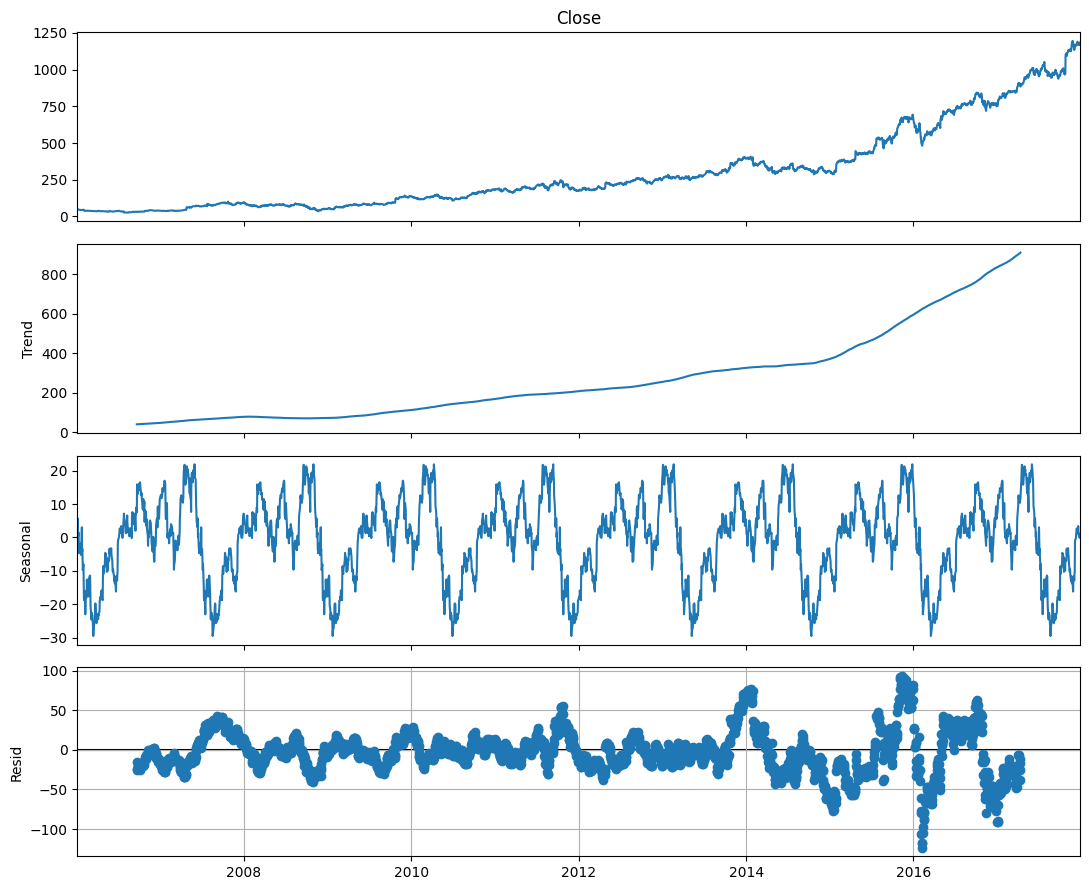

In [54]:
# Descomposición de Serie de Tiempo (Amazon)
# Para la descomposición
rcParams['figure.figsize'] = 11, 9

# Se usa frecuencia anual
descomposed_amazon_volume = sm.tsa.seasonal_decompose(df_amazon['Close'], period=360)

figure= descomposed_amazon_volume.plot()
plt.grid()
plt.show()

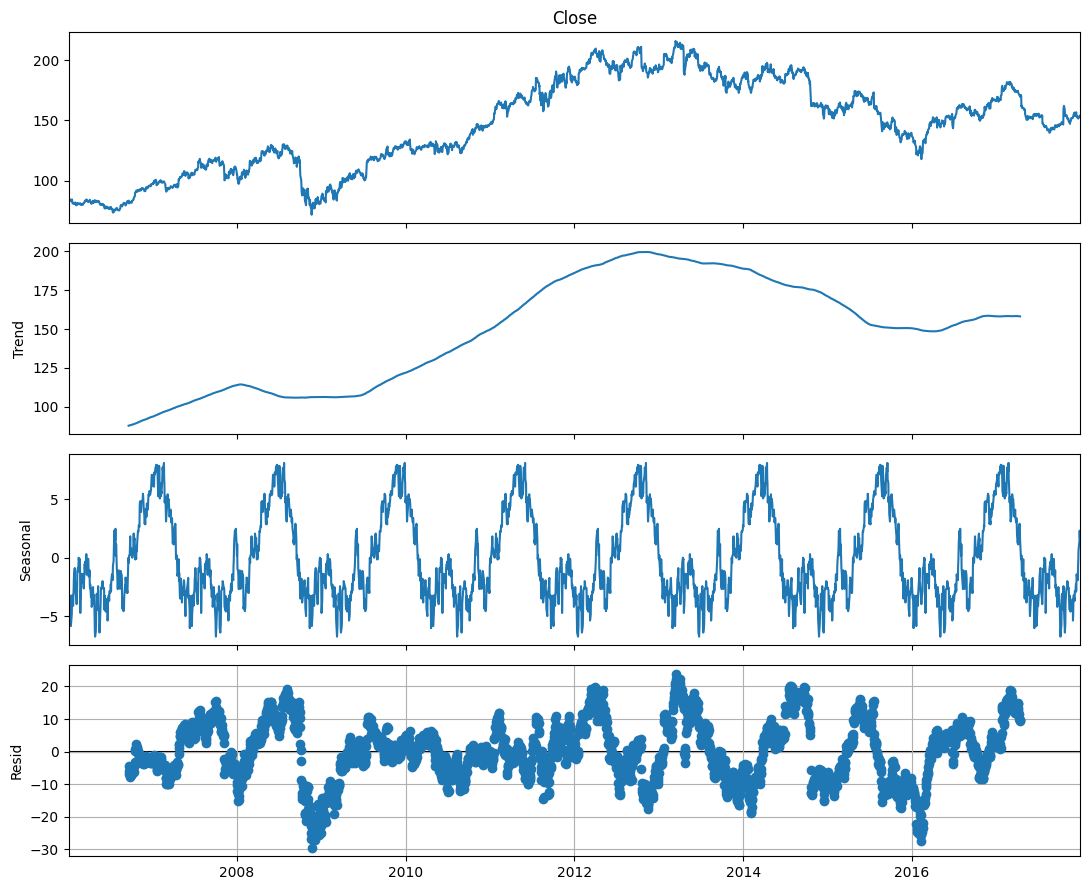

In [55]:
# Descomposición de Serie de Tiempo (IBM)
# Para la descomposición
rcParams['figure.figsize'] = 11, 9

# Se usa frecuencia anual
descomposed_ibm_volume = sm.tsa.seasonal_decompose(df_ibm['Close'], period=360)

figure= descomposed_ibm_volume.plot()
plt.grid()
plt.show()